In [2]:
import tensorflow as tf
import keras as ks
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [3]:
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {ks.__version__}")

Tensorflow Version 2.19.0
Keras Version 3.9.0


In [4]:
check_list = ['GPU','CPU']

for ob in check_list:
    c = tf.config.list_physical_devices(ob)
    if len(c) > 0:
        print(f"{ob} is avaliable ")
    else:
        print(f"{ob} is not avaliable")

GPU is not avaliable
CPU is avaliable 


In [5]:
mnist = tf.keras.datasets.mnist

In [6]:
mnist

<module 'keras.api.datasets.mnist' from 'c:\\Users\\pankr\\miniconda3\\envs\\yolov8_env\\lib\\site-packages\\keras\\api\\datasets\\mnist\\__init__.py'>

In [7]:
(X_train, Y_train), (X_test, y_test) = mnist.load_data()

In [8]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [9]:
print(f"Data Type of X_train {X_train.dtype}")
print(f"Data Type of X_train {Y_train.dtype}")

Data Type of X_train uint8
Data Type of X_train uint8


In [16]:
x_valid, x_train = X_train[:5000]/255, X_train[5000:]/255
y_valid, y_train = Y_train[:5000]/255, Y_train[5000:]
x_test = X_test/255

In [17]:
# Train 50000
# Validation - 5000
# Test - 10000

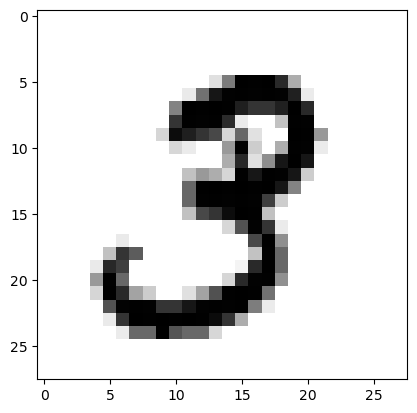

In [18]:
plt.imshow(x_train[1],cmap='binary')

<Axes: >

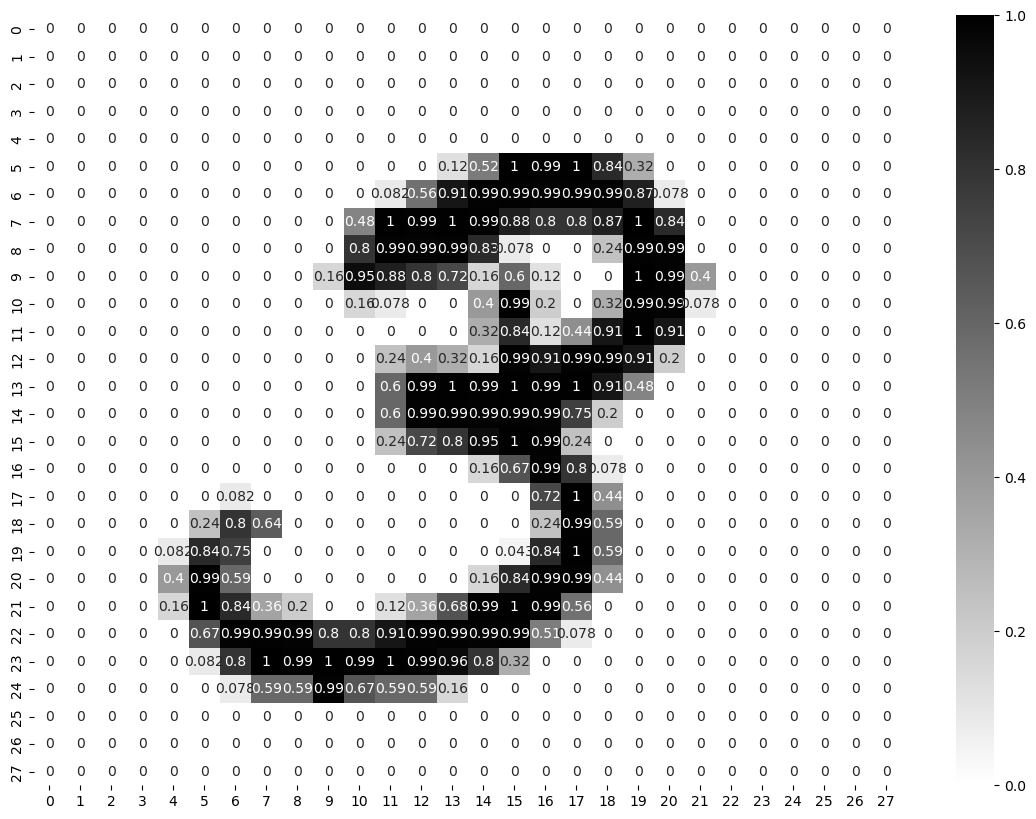

In [19]:
plt.figure(figsize=(14,10))
sns.heatmap(x_train[1],annot=True,cmap='binary')

In [20]:
LAYERS = [
    ks.layers.Flatten(input_shape=[28,28],name='inputLayer'),
    ks.layers.Dense(300,activation='relu',name='hiddenLayer1'),
    ks.layers.Dense(10,activation='softmax',name='outputLayer') 
]
model_clf = ks.models.Sequential(LAYERS)

c:\Users\pankr\miniconda3\envs\yolov8_env\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model_clf.layers

[<Flatten name=inputLayer, built=True>,
 <Dense name=hiddenLayer1, built=True>,
 <Dense name=outputLayer, built=True>]

In [22]:
model_clf.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputLayer (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenLayer1 (Dense)            │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputLayer (Dense)             │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 238,510 (931.68 KB)

 Trainable params: 238,510 (931.68 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [24]:
hidden2 = model_clf.layers[2]
print(f"hidden2 name:{hidden2.name}")

hidden2 name:outputLayer


In [25]:
hidden1.get_weights()[0].shape

(784, 300)

In [26]:
hidden2.get_weights()[0].shape

(300, 10)

In [27]:
weights, biases = hidden1.get_weights()

In [28]:
weights.shape

(784, 300)

In [29]:
biases.shape

(300,)

In [30]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ['accuracy']

model_clf.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZER,metrics=METRICS)

## Tensorboard Callback Function

In [31]:
import time
import os
def get_log_path(log_dir='logs/fit'):
    fileName = time.strftime("Log_%Y_%m_%d_%H_%M_%S")
    logs_path = os.path.join(log_dir,fileName)
    print(f"Saving logs at {logs_path}")
    return logs_path

log_dir = get_log_path()
tb_cb = ks.callbacks.TensorBoard(log_dir=log_dir)

Saving logs at logs/fit\Log_2025_03_23_22_26_33


## Early Stopping Callback

In [32]:
early_stopping_cb = ks.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

## Model Checkpointing Callback

In [33]:
CKPT_path = "Model_ckpt.h5"
checkpointing_cb = ks.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True)

In [36]:
# Training
Epochs = 30
validation_set = (x_valid, y_valid)
history = model_clf.fit(x_train, y_train, epochs=Epochs, validation_data=validation_set, batch_size=32, callbacks=[tb_cb, early_stopping_cb, checkpointing_cb])

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9034 - loss: 0.3521 - val_accuracy: 0.0926 - val_loss: 7.7797
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9189 - loss: 0.2928 - val_accuracy: 0.0930 - val_loss: 8.2697
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9299 - loss: 0.2565 - val_accuracy: 0.0940 - val_loss: 8.3063
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.9342 - loss: 0.2355 - val_accuracy: 0.0938 - val_loss: 8.6536
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9397 - loss: 0.2161 - val_accuracy: 0.0940 - val_loss: 8.8985
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9431 - loss: 0.2009 - val_accuracy: 0.0944 - val_loss: 8.6966


In [37]:
ckpt_model = ks.models.load_model("Model_ckpt.h5")
ckpt_model.compile(optimizer=OPTIMIZER, loss=LOSS_FUNCTION, metrics=METRICS)

history = ckpt_model.fit(x_train,y_train, epochs=10, validation_data=validation_set,batch_size=32,callbacks=[tb_cb, early_stopping_cb, checkpointing_cb])

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9035 - loss: 0.3509 - val_accuracy: 0.0928 - val_loss: 7.5928
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9179 - loss: 0.2965 - val_accuracy: 0.0934 - val_loss: 7.9439
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9284 - loss: 0.2567 - val_accuracy: 0.0932 - val_loss: 8.4918
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9358 - loss: 0.2344 - val_accuracy: 0.0938 - val_loss: 8.8240
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9398 - loss: 0.2163 - val_accuracy: 0.0940 - val_loss: 8.8293
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9465 - loss: 0.1948 - val_accuracy: 0.0938 - val_loss: 9.0629


#### Saving the Model

In [11]:
import time
import os

def save_model_path(MODEL_dir='TRAINED_MODEL'):
    os.makedirs(MODEL_dir,exist_ok=True)
    fileName= time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
    model_path = os.path.join(MODEL_dir,fileName)
    print(f"Model {fileName} will be saved at {model_path}")
    return model_path

In [12]:
UNIQUE_PATH = save_model_path()
UNIQUE_PATH

Model Model_2025_03_23_22_25_05_.h5 will be saved at TRAINED_MODEL\Model_2025_03_23_22_25_05_.h5


'TRAINED_MODEL\\Model_2025_03_23_22_25_05_.h5'

In [38]:
ks.models.save_model(model_clf,UNIQUE_PATH)

In [39]:
history.params

{'verbose': 'auto', 'epochs': 10, 'steps': 1719}

In [40]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.908073,0.333586,0.0928,7.592827
1,0.920909,0.284070,0.0934,7.943901
2,0.929509,0.253536,0.0932,8.491802
3,0.935745,0.230824,0.0938,8.823953
4,0.940982,0.212568,0.0940,8.829321
5,0.945218,0.197016,0.0938,9.062874


<Axes: >

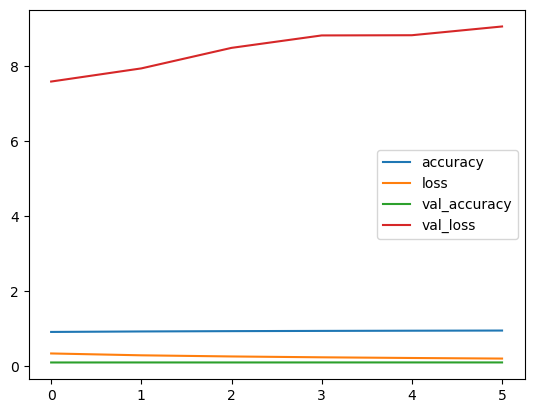

In [41]:
pd.DataFrame(history.history).plot()

In [42]:
model_clf.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9082 - loss: 0.3332


[0.2909697890281677, 0.9193999767303467]

In [43]:
x_new = x_test[:3]

In [44]:
actual = y_test[:3]

In [45]:
actual

array([7, 2, 1], dtype=uint8)

In [46]:
y_prob = model_clf.predict(x_new)
y_prob.round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


array([[0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.997, 0.   ,
        0.002],
       [0.019, 0.   , 0.837, 0.039, 0.   , 0.031, 0.056, 0.   , 0.018,
        0.   ],
       [0.   , 0.947, 0.012, 0.007, 0.001, 0.003, 0.004, 0.006, 0.015,
        0.004]], dtype=float32)

In [47]:
y_pred = np.argmax(y_prob,axis=-1)

In [48]:
y_pred

array([7, 2, 1], dtype=int64)

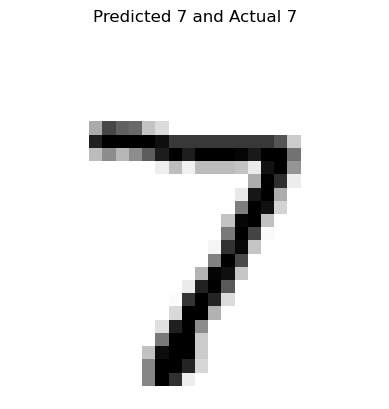

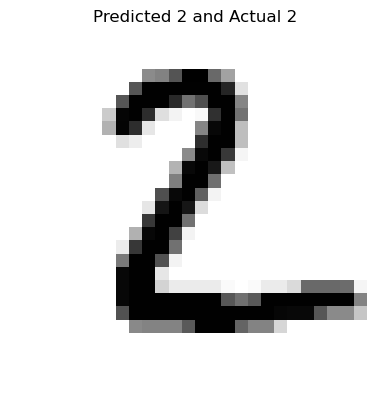

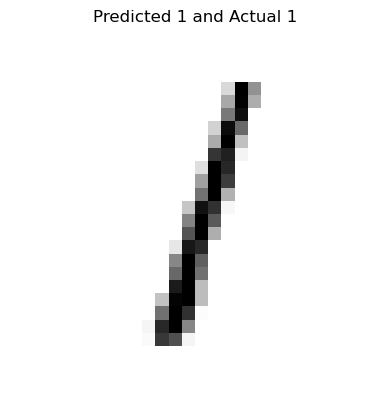

In [50]:
for data,pred,actual_data in zip(x_new, y_pred, actual):
    plt.imshow(data,cmap='binary')
    plt.title(f'Predicted {pred} and Actual {actual_data}')
    plt.axis("off")
    plt.show()
